In [ ]:
import sys
sys.path.append("/Users/dorisv/Documents/imaging_behavior")
sys.path.append("C:\Users\dorisv\Desktop\Shawn's data")

try:
    import aibs
except:
    import aibs
    
from aibs.dev.shawndev import FileTools
from aibs.dev.shawndev.BehaviorEvents import BehaviorEvents
from aibs.Analysis.InDevelopment import ForageSession
from aibs.dev.shawndev import Forage, Psychometrics, ForageTools, FileTools
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.width', 200)
pd.set_option('display.max_rows', 30)
pd.set_option('display.notebook_repr_html',True)
%matplotlib inline
import matplotlib
import os
from scipy.misc import comb
import scipy.stats

import imaging_behavior as im
import imaging_behavior.plotting.plotting_functions as pf
import imaging_behavior.plotting.utilities as pu
from aibs.Analysis.Core import smooth

from scipy.optimize import minimize
from scipy.optimize import basinhopping
import math
from math import log
from numpy import linalg as LA

In [1]:
#load data
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

C:\Anaconda\lib\site-packages\IPython\nbformat\current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
%%capture capt

execute_notebook("C:\Users\dorisv\Desktop\Shawn's data\Object recognition - Running speed from behavioral log file.ipynb")

,Image,Ori,PosY,Size,abs_reward_rate,average_speed,duration,end_frame,end_time,first_lick_latency_0,...,lick_times_1,mouse_id,number_of_licks_0,number_of_licks_1,number_of_rewards,reward_times,start_date_time,start_frame,start_time,stop_date_time
0,bird,-15,0,550,1.408580,54.905943,1.742769,104,1.742769,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,0,0.000000,2014-10-03 14:49:45.315000
1,bird,0,0,400,1.408580,74.060865,1.182906,175,2.925675,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,105,1.742769,2014-10-03 14:49:45.315000
2,bird,-15,0,550,1.373647,75.229013,1.250163,250,4.175839,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,176,2.925675,2014-10-03 14:49:45.315000
3,bird,0,0,350,1.317835,45.388544,3.349858,451,7.525696,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,251,4.175839,2014-10-03 14:49:45.315000
4,bird,45,0,550,1.261059,25.822834,5.015883,752,12.541580,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,452,7.525696,2014-10-03 14:49:45.315000
5,bird,0,0,450,1.214683,84.197297,1.483320,841,14.024900,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,753,12.541580,2014-10-03 14:49:45.315000
6,bird,45,0,550,1.167418,70.252978,2.033290,963,16.058190,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,842,14.024900,2014-10-03 14:49:45.315000
7,bird,-15,0,600,1.084758,63.358064,2.100066,1089,18.158257,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,964,16.058190,2014-10-03 14:49:45.315000
8,bird,45,0,400,1.052723,36.910872,4.915870,1384,23.074127,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,1090,18.158257,2014-10-03 14:49:45.315000
9,bird,-15,0,400,1.015602,51.740277,2.800250,1552,25.874377,NaN,...,[],M130587,0,0,0,[],2014-10-03 13:29:50.625000,1385,23.074127,2014-10-03 14:49:45.315000


,Size,Image,Ori,PosY,trial,time,terraincode,pausetime,choice,selectiontime,istarget,speed,lapdistance,timebeforezone,slowing_f,mouse,date
0,400,bird,0,0,1,1.840244,53,0.267095,False,1,False,2152.301946,3937,0.099917,1.151120,M130587,2014-10-03 13:29:50.625000
1,550,bird,-15,0,2,3.024151,36,0.268031,False,1,False,2155.681332,2455,0.100434,0.995480,M130587,2014-10-03 13:29:50.625000
2,350,bird,0,0,3,4.273621,54,0.399960,False,1,False,1231.647159,2661,0.115117,1.148952,M130587,2014-10-03 13:29:50.625000
3,550,bird,45,0,4,7.623390,92,0.667990,False,1,False,1416.589407,4376,0.200129,11.667522,M130587,2014-10-03 13:29:50.625000
4,450,bird,0,0,5,12.638539,52,0.232075,False,1,False,2709.459253,3349,0.115528,0.995757,M130587,2014-10-03 13:29:50.625000
5,550,bird,45,0,6,14.122473,92,0.249965,False,1,False,1959.213561,3544,0.083261,1.200958,M130587,2014-10-03 13:29:50.625000
6,600,bird,-15,0,7,16.155746,35,0.314834,False,1,False,1996.971224,4097,0.150395,0.997373,M130587,2014-10-03 13:29:50.625000
7,400,bird,45,0,8,18.256180,95,0.832834,False,1,False,1103.000564,3796,0.132865,1.263148,M130587,2014-10-03 13:29:50.625000
8,400,bird,-15,0,9,23.172326,39,0.384844,False,1,False,1537.117166,5221,0.150351,0.998283,M130587,2014-10-03 13:29:50.625000
9,400,mushroom,15,0,10,25.971682,60,2.282713,True,1,True,1009.442921,4172,0.165107,1.319022,M130587,2014-10-03 13:29:50.625000


(-10, 90)

In [3]:
sizes = np.sort(dataFrame.Size.unique())
orientations = np.sort(dataFrame.Ori.unique())

#for the purposes of the experiment, should be m=n=7
m = len(sizes)
n = len(orientations)

evenTest1 = isinstance((m/float(2)), (int, long))
evenTest2 = isinstance((n/float(2)), (int, long))
    
if evenTest1:
    s_T = sizes[m/2-1]
else:
    s_T = sizes[m/2]
        
if evenTest2:
    o_T = orientations[n/2-1]    
else:
    o_T = orientations[n/2]
                
s_max = sizes[m-1]

print dataFrame.columns
print dataFrame.mouse_id.unique()
#dataFrame[dataFrame.Image==]

dataFrame.Image[dataFrame.Image == "CoxImage1.png"] = "mushroom"
dataFrame.Image[dataFrame.Image == "CoxImage2.png"] = "bird"

N = len(dataFrame)
print N

N_m = len(dataFrame.Image[dataFrame.Image=="mushroom"])
N_b = len(dataFrame.Image[dataFrame.Image=="bird"])
print N_m, N_b

dataFrame["total_trial_ind"] = range(0, len(dataFrame))
dataFrame.head()

Index([u'Image', u'Ori', u'PosY', u'Size', u'abs_reward_rate', u'duration', u'end_frame', u'end_time', u'first_lick_latency_0', u'first_lick_latency_1', u'image', u'jcam_end_ind_exclusive', u'jcam_start_ind', u'lap_number', u'lick_duration_0', u'lick_duration_1', u'lick_times_0', u'lick_times_1', u'mouse_id', u'number_of_licks_0', u'number_of_licks_1', u'number_of_rewards', u'reward_times', u'start_date_time', u'start_frame', u'start_time', u'stop_date_time', u'choice', u'total_trial_ind'], dtype='object')
['M143454']
747
282 465


,Image,Ori,PosY,Size,abs_reward_rate,duration,end_frame,end_time,first_lick_latency_0,first_lick_latency_1,...,number_of_licks_0,number_of_licks_1,number_of_rewards,reward_times,start_date_time,start_frame,start_time,stop_date_time,choice,total_trial_ind
1,bird,-15,0,500,1.786181,3.449961,390,6.549960,NaN,None,...,0,0,0,[],2014-10-27 12:54:41.393000,185,3.099999,2014-10-27 14:05:33.684000,True,0
2,mushroom,-30,0,400,1.600021,6.633207,788,13.183167,1.649916,None,...,5,0,1,[8.74988234113],2014-10-27 12:54:41.393000,391,6.549960,2014-10-27 14:05:33.684000,False,1
3,bird,45,0,400,1.552413,3.216621,980,16.399788,NaN,None,...,0,0,0,[],2014-10-27 12:54:41.393000,789,13.183167,2014-10-27 14:05:33.684000,True,2
4,mushroom,0,0,550,2.169573,6.249905,1355,22.649692,1.016686,None,...,24,0,1,[18.4498032981],2014-10-27 12:54:41.393000,981,16.399788,2014-10-27 14:05:33.684000,True,3
5,bird,45,0,500,2.720092,8.333357,1854,30.983049,1.200000,None,...,15,0,0,[],2014-10-27 12:54:41.393000,1356,22.649692,2014-10-27 14:05:33.684000,False,4


In [4]:
def p_real(j):
    
    dataFrame = dataFrame_list[j]
            
    p_m_real = np.zeros((len(orientations),len(sizes)))
    p_b_real = np.zeros((len(orientations),len(sizes)))
    trials_tot = np.zeros((len(orientations),len(sizes)))
    trials_stop = np.zeros((len(orientations),len(sizes)))
    trials_m = np.zeros((len(orientations),len(sizes)))
    trials_b = np.zeros((len(orientations),len(sizes)))
    trials_stop_m = np.zeros((len(orientations),len(sizes)))
    trials_stop_b = np.zeros((len(orientations),len(sizes)))
    correct_m = np.zeros((len(orientations), len(sizes)))
    correct_b = np.zeros((len(orientations), len(sizes)))

    for ind2,o in enumerate(orientations):
        for ind1,s in enumerate(sizes):
            
            trials_tot[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)].total_trial_ind)
            #print ind1, ind2, trials_tot[ind2,ind1]
            trials_stop[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.choice==1)].total_trial_ind)

            trials_m[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='mushroom')].total_trial_ind)
            trials_b[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='bird')].total_trial_ind)   
            
            trials_stop_m[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='mushroom')&(dataFrame.choice==1)].total_trial_ind)
            trials_stop_b[ind2,ind1] = len(dataFrame[(dataFrame.Size==s)&(dataFrame.Ori==o)&(dataFrame.Image=='bird')&(dataFrame.choice==1)].total_trial_ind)   
            
            p_m_real[ind2, ind1] = trials_m[ind2,ind1]/trials_tot[ind2,ind1]
            p_b_real[ind2, ind1] = trials_b[ind2,ind1]/trials_tot[ind2,ind1]   
            
            correct_m[ind2, ind1] = len(dataFrame.total_trial_ind[(dataFrame.Size==s) & (dataFrame.Ori==o) & (dataFrame.Image=="mushroom") & (dataFrame.choice == 1)])/trials_m[ind2,ind1]
            correct_b[ind2, ind1] = len(dataFrame.total_trial_ind[(dataFrame.Size==s) & (dataFrame.Ori==o) & (dataFrame.Image=="bird") & (dataFrame.choice == 0)])/trials_b[ind2,ind1]
          
    return p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, correct_m, correct_b

[[ 0.5         0.46153846  0.33333333  0.35714286  0.44444444  0.73333333
   0.125     ]
 [ 0.5         0.6         0.3         0.46666667  0.25        0.38461538
   0.54545455]
 [ 0.16666667  0.3         0.25        0.14285714  0.27272727  0.22222222
   0.33333333]
 [ 0.25        0.36363636  0.4         0.5         0.125       0.28571429
   0.26666667]
 [ 0.61111111  0.33333333  0.42857143  0.16666667  0.25        0.14285714
   0.5       ]
 [ 0.1         0.61538462  0.375       0.33333333  0.16666667  0.125
   0.58333333]
 [ 0.35714286  0.4         0.33333333  0.28571429  0.21428571  0.
   0.35714286]]
[[ 0.8         0.72727273  0.81818182  0.46666667  0.57142857  0.48        0.4       ]
 [ 0.70588235  0.66666667  0.35714286  0.64285714  0.46153846  0.63636364
   1.        ]
 [ 0.56521739  0.5         0.44444444  0.46153846  0.57142857  0.4         0.4       ]
 [ 0.66666667  0.71428571  0.46153846  0.54166667  0.44444444  0.61111111
   0.46666667]
 [ 0.6875      0.52631579  0.58823529

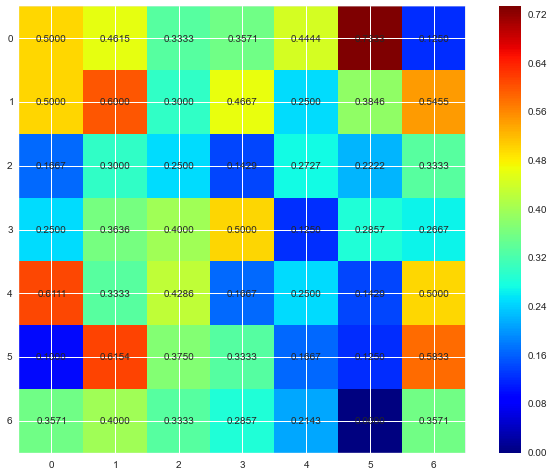

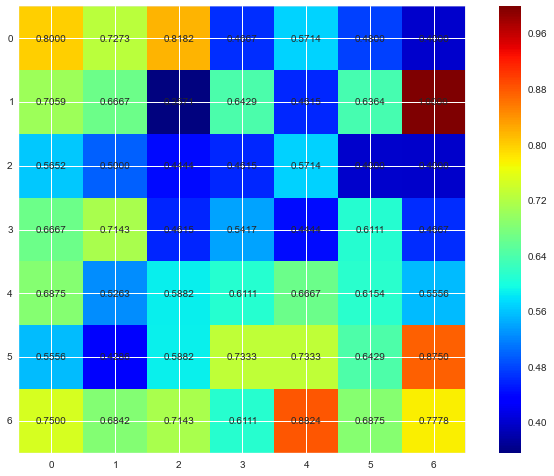

mushroom 0.337943462433 0.156343684069
bird 0.610161279427 0.140883467857
mushroom 0.486111111111 0.139172046958
bird 0.491134036032 0.119476916815
mushroom 0.373242630385 0.130118429056
bird 0.592905733722 0.114589499268
mushroom 0.402696793003 0.15563571354
bird 0.482745825603 0.139672229107
mushroom 0.662779397473 0.185824326297
bird 0.403896103896 0.143163779527
mushroom 0.342970521542 0.132749930714
bird 0.553244374673 0.125596191779
mushroom 0.847424684159 0.148489421886
bird 0.18556998557 0.128906477702
mushroom 0.271036899608 0.162722121341
bird 0.602818270165 0.100311506892
mushroom 0.855685131195 0.141343467903
bird 0.184353741497 0.13142854013
mushroom 0.448412698413 0.18082789508
bird 0.565184815185 0.128781663134
mushroom 0.759475218659 0.174516308468
bird 0.331292517007 0.152623376432
mushroom 0.684766763848 0.174686271277
bird 0.360379303236 0.179661070139
mushroom 0.544946550049 0.191048782617
bird 0.423933209647 0.139429554884
mushroom 0.321145124717 0.175987313447
bir

In [5]:
p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, correct_m, correct_b = p_real(1)

#print trials_stop_m/trials_m, trials_stop_b/trials_b
#print sum(sum(trials_stop_m/trials_m > trials_stop_b/trials_b))

print correct_m
print correct_b

fig = plt.figure(figsize=(12, 8))
plt.imshow(correct_m, interpolation = 'none')
plt.jet()
plt.colorbar()

for y in range(correct_m.shape[0]):
    for x in range(correct_m.shape[1]):
        plt.text(x, y, '%.4f' % correct_m[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

plt.show()

fig = plt.figure(figsize=(12, 8))
plt.imshow(correct_b, interpolation = 'none')
plt.colorbar()

for y in range(correct_b.shape[0]):
    for x in range(correct_b.shape[1]):
        plt.text(x, y, '%.4f' % correct_b[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )

plt.show()

for j in good_ones:
    p_m_real, p_b_real, trials_tot, trials_stop, trials_m, trials_b, trials_stop_m, trials_stop_b, correct_m, correct_b = p_real(j)
    print "mushroom", np.mean(correct_m), np.std(correct_m)
    print "bird", np.mean(correct_b), np.std(correct_b)